In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx

In [3]:
def dict_to_list(x):
    x = list(x.items())
    x = sorted(x, key=lambda x:x[1], reverse=True)
    return x

In [4]:
np_df = pd.read_csv("np_df_Unique_NOGarage.csv") # change this file with whatever you want!
# np_df.hist("count")

G = nx.from_pandas_edgelist(np_df, "stop_A", "stop_B", "count")

# betweenness centrality
btwn_cent = nx.betweenness_centrality(G, weight='count')
#btwn_cent = dict_to_list(btwn_cent)

# node degrees
degree = G.degree(weight="count")

degree = dict(degree) # this is needed because G.degree doesn't return a dict()
degree = dict_to_list(degree)

# eigenvector centrality
eigen_cent = nx.eigenvector_centrality(G, weight='count')
eigen_cent = dict_to_list(eigen_cent)

# closeness centrality
close_cent = nx.closeness_centrality(G)
close_cent = dict_to_list(close_cent)


In [12]:
degree;

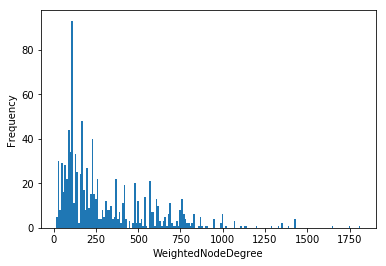

In [41]:
np_df = pd.read_csv("np_df_Unique_NOGarage.csv") # change this file with whatever you want!
# np_df.hist("count")

G = nx.from_pandas_edgelist(np_df, "stop_A", "stop_B", "count")
degree = G.degree(weight="count")
degree = dict(degree) # this is needed because G.degree doesn't return a dict()
degree = dict_to_list(degree)
df = pd.DataFrame(degree, columns=['StopID', 'WeightedNodeDegree'])
W = df['WeightedNodeDegree']
binwidth = 10
plt.hist(W, bins=range(min(W), max(W) + binwidth, binwidth));
plt.ylabel('Frequency');
plt.xlabel('WeightedNodeDegree');

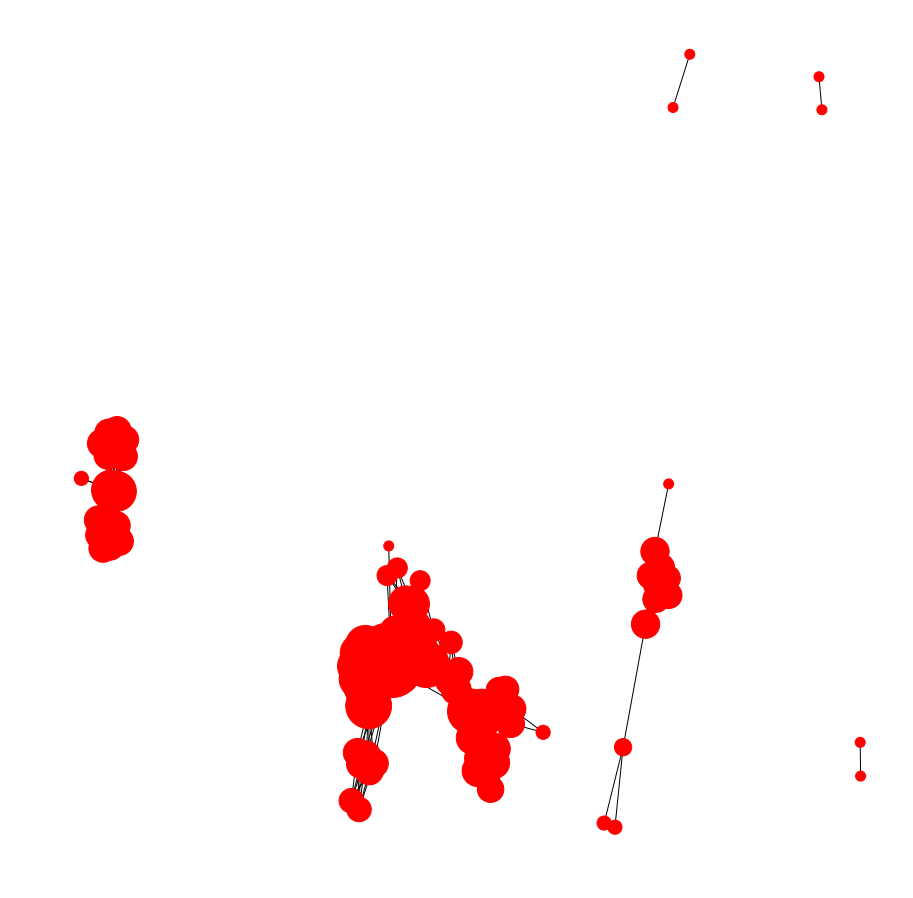

In [9]:
#visualisation -- discounting edges with weight <10
np_df_10 = np_df.loc[np_df['count'] >= 10]
G_10 = nx.from_pandas_edgelist(np_df_10, "stop_A", "stop_B", "count")
Gc_10 = max(nx.connected_component_subgraphs(G_10), key=len)

plt.figure(1, figsize=(12,12))
d = G_10.degree()
ax = nx.draw(G_10, nodelist=dict(d).keys(), node_size=[v*100 for v in dict(d).values()])



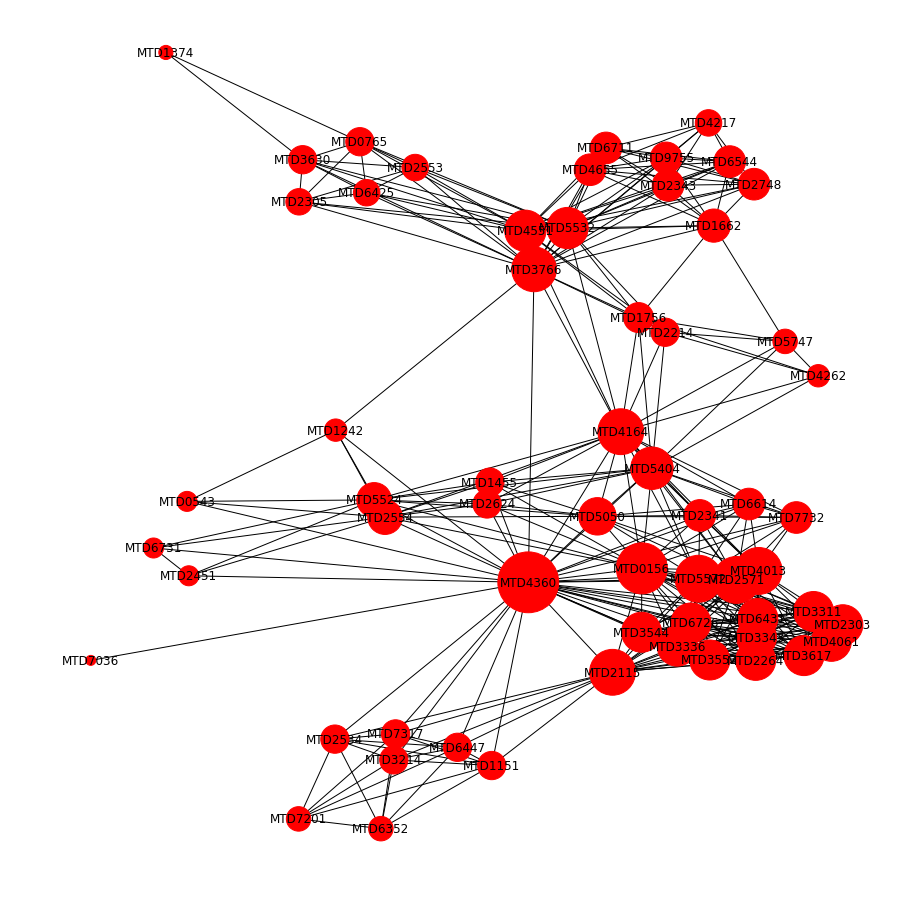

In [42]:
plt.figure(2, figsize=(12,12))
d10 = Gc_10.degree()
ax10 = nx.draw(Gc_10, nodelist=dict(d10).keys(), node_size=[v*100 for v in dict(d10).values()], with_labels = True)

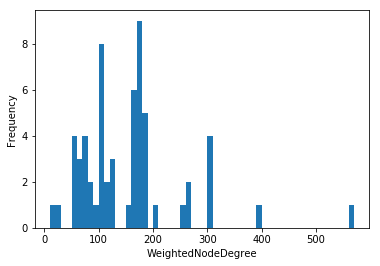

In [46]:
d10_w = Gc_10.degree(weight="count")
d10_w = dict(d10_w) # this is needed because G.degree doesn't return a dict()
d10_w = dict_to_list(d10_w)
df = pd.DataFrame(d10_w, columns=['StopID', 'WeightedNodeDegree'])
W = df['WeightedNodeDegree']
binwidth = 10
plt.hist(W, bins=range(min(W), max(W) + binwidth, binwidth));
plt.ylabel('Frequency');
plt.xlabel('WeightedNodeDegree');